# **Prediction of the Probability of Suffering Different Crimes in Mexico**
____

Author: **Daniel Eduardo López**

**03/05/2023**

<a href="https://www.linkedin.com/in/daniel-eduardo-lopez"><font size="-1">LinkedIn</font></a> 

<a href="https://github.com/DanielEduardoLopez"><font size="-1">GitHub </font></a>

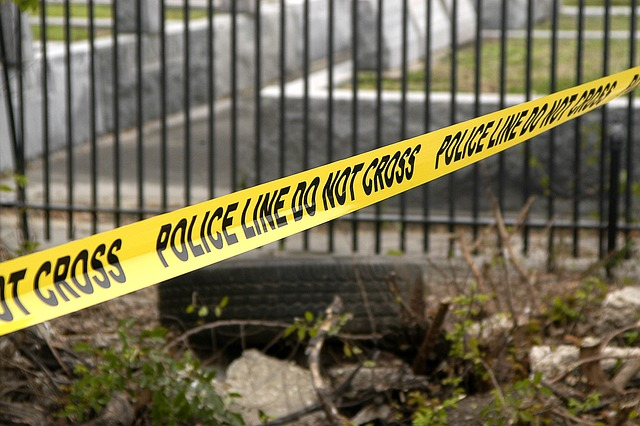

<font size="-1">Image Credit: <a href="https://pixabay.com/photos/police-line-yellow-crime-cemetery-3953745/">ValynPi14</a></font>

___
## **Table of Contents**
___

1. [**Introduction**](#intro)<br>
    1.1. [Background](#background)<br>
    1.2. [General Objective](#objective)<br>
    1.3. [Research Question](#question)<br>
    1.4. [Hypothesis](#hypothesis)<br>
    1.5. [Abridged Methodology](#methodology)<br>
    1.6. [Notebook's Goal](#goal)<br>
2. [**Data Collection**](#collection)<br>
3. [**Data Exploration**](#exploration)<br>
    3.1 [Data Description](#description)<br>
        - [Attributes](#columns)<br>
        - [Values Encoding](#values)<br>
    3.2 [Data Quality](#quality)<br>
        - [Missing values](#missing)<br>
        - [Outliers](#outliers)<br>
    3.3 [Exploratory Data Analysis](#eda)<br>
4. [**Data Preparation**](#preparation)<br>
5. [**Data Modeling**](#modeling)<br>
6. [**Evaluation**](#evaluation)<br>
7. [**Conclusions**](#conclusions)<br>
8. [**Bibliography**](#bibliography)<br>

<a class="anchor" id="intro"></a>
___
## **1. Introduction**
___



### **1.1 Background** <a class="anchor" id="intro"></a>

Since the 2000's, Mexico has experienced a sustained increase in crime and violence due to both criminal organizations and common criminals. In this sense, crime has become the top concern for the overall population [(Calderón, Heinle, Kuckertz, Rodríguez-Ferreira & Shirk, 2021)](#calderon). 

Some of the reasons for such a spread of crime and violence are the purposeful fragmentation of the criminal groups by the Mexican government, the consequent increase on competition and diversification among criminal organizations, a rampant corruption within the Mexican institutions, ineffective socio-economic policies, widespread impunity and low effective prosecution rates, and the alienation of local populations to criminals [(Felbab-Brown, 2019)](#calderon). 

In this context, it has been estimated that the crime rate was of 94.1 per 100,000 inhabitants before the COVID-19 lockdown in Mexico [(Balmori de la Miyar, Hoehn‑Velasco & Silverio‑Murillo, 2021)](#balmori).

However, the distribution of crime and violence is uneven accross the country. Thus, it is desirable to know how likely is suffering a crime based on the demographic and socio-economic profile of a given household/person, rather than just sticking to national or regional averages. 

Even though official crime data exists within the country, it has been estimated that the percentage of unreported crimes was of about 93.3% in 2020 [(Mexico Violence Resource Project, 2022)](#resource). In order to address this issue, the **National Survey of Victimization and Perception of Public Safety** (ENVIPE, by its acronym in Spanish) has been develop as a tool to gather representative data about the levels of crime incidence and unreported crimes -*cifra negra*- [(INEGI, 2021)](#inegi). 

Therefore, the ENVIPE data was used to train several classification models for the following crimes:
1. Total vehicle theft
2. Partial vehicle theft
3. Vandalism
4. Burglary
5. Kidnapping
6. Enforced disappearance
7. Murder
8. Theft
9. Other thefts
10. Bank fraud
11. Other frauds
12. Extortion
13. Threats
14. Injuries
15. Assault
16. Rape
17. Other crimes

This, in order to have a more accurate estimation of the probability of suffering different crimes in Mexico, according to an specific demographic and socio-economic profile.

### **1.2 General Objective** <a class="anchor" id="objective"></a>

To predict the probability of suffering different crimes in Mexico based on demographic and socio-economic data.


### **1.3 Research Question** <a class="anchor" id="question"></a>

What is the probability of suffering different crimes in Mexico based on demographic and socio-economic data?


### **1.4 Hypothesis** <a class="anchor" id="hypothesis"></a>

The overall probability of suffering a crime in Mexico is about **0.094%** [(Balmori de la Miyar, Hoehn‑Velasco & Silverio‑Murillo, 2021)](#balmori). However, such probability is different according to the socioeconomic and demographic profile, with the low-income profiles having a higher probability of suffering crimes than the high-income profiles.

### **1.5 Abridged Methodology** <a class="anchor" id="methodology"></a>


The methodology of the present study is based on Rollin’s *Foundational Methodology for Data Science* [(Rollins, 2015)](#rollins):

1. **Analytical approach**: Building and evaluation of a **multi-label classification model**.
2. **Data requirements**: Data about the incidence of the following crimes: Total vehicle theft, Partial vehicle theft, Vandalism, Burglary, Kidnapping, Enforced Disappearance, Murder, Theft, Other thefts, Bank fraud, Other frauds, Extortion, Threats, Injuries, Assault, Rape, and Other crimes; as well as data about the demographics and socio-economic conditions of the households/persons affected by those crimes.
3. **Data collection**: Data from ENVIPE was retrieved from the <a href="https://www.inegi.org.mx/programas/envipe/2022/#Datos_abiertos">INEGI's website</a>. Then, the different tables from ENVIPE were used to build a database in MySQL 8.0.32.0 (see the corresponding SQL script <a href="https://raw.githubusercontent.com/DanielEduardoLopez/PublicSafetyMX/main/sql_script.sql">here</a>). After that, said database was queried to gather only the relevant data and build the dataset to be used in the next steps (see the SQL query used <a href="https://raw.githubusercontent.com/DanielEduardoLopez/PublicSafetyMX/main/sql_query.sql">here</a>).
4. **Data exploration**: Data was explored with Python 3 and its libraries Numpy, Pandas, Matplotlib and Seaborn.
5. **Data preparation**: Data was cleaned and prepared with Python 3 and its libraries Numpy and Pandas.
6. **Data modeling**: The dataset was split in training, validation and testing sets. Then, a **multilayer perceptron (MLP) model** was built using Tensorflow and Keras. Sigmoid was used as the activation function for the output layer, whereas ReLU activation function was used for the hidden layers. Furthermore, the binary cross-entropy loss function and the Adam optimizer were used for the model compilation.
7. **Evaluation**: The algorithms predictions were primarily evaluated through the accuracy rate, the area under the ROC curve (AUC ROC), and the root-mean-square error (RMSE).
8. **Implementation**: An app was built and deployed with Streamlit.

### **1.6 Notebook's Goal** <a class="anchor" id="methodology"></a>

In this context, the purpose of the present notebook is to perform the process of data exploration, data preparation, data modeling and model evaluation.

In [1]:
# Loading Requirements Text File
#!pip install -r requirements.txt

In [2]:
# Libraries installation
!pip install seaborn
!pip install scikit-learn

# Directly installed in the terminal
#!python -m pip install tensorflow
#!python -m pip install keras

In [3]:
# Libraries importation
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib.ticker import StrMethodFormatter
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
import seaborn as sns
from sklearn.model_selection import (train_test_split,
                                     RepeatedKFold
                                     )
from sklearn.metrics import ( 
                            accuracy_score,                             
                            roc_auc_score,
                            RocCurveDisplay,    
                            mean_squared_error)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import sys
import os

In [4]:
# Setting theme and plot resolution
sns.set_theme(context = 'notebook', style = 'darkgrid')
mpl.rcParams["figure.dpi"] = 100
mpl.rcParams["savefig.dpi"] = 300
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Setting default plot's aesthetics
plotfontcolor = 'dimgray'
mpl.rcParams['text.color'] = plotfontcolor
mpl.rcParams['axes.labelcolor'] = plotfontcolor
mpl.rcParams['xtick.color'] = plotfontcolor
mpl.rcParams['ytick.color'] = plotfontcolor
mpl.rcParams["font.size"] = 10
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 11
mpl.rcParams["axes.labelweight"] = "bold"
mpl.rcParams["axes.titleweight"] = "bold"
#mpl.rcParams['font.family'] = 'sans-serif'
#mpl.rcParams['font.family'] = 'serif'

<a class="anchor" id="collection"></a>
___
## **2. Data Collection**
___

First, data from ENVIPE was retrieved from the <a href="https://www.inegi.org.mx/programas/envipe/2022/#Datos_abiertos">INEGI's website</a>, in form of several CSV files. 

Then, the encoding of the different original CSV files from INEGI were transformed to **UTF-8** using a <a href="https://github.com/DanielEduardoLopez/PublicSafetyMX/blob/45d5bae551ed9be40e30cd1a9578e45ddf3c69c0/CleanCSV.ipynb">previous notebook</a>. Furthermore, the datatypes of the different atributes were also adjusted.

Later, a database was built in MySQL 8.0.32.0 (see the corresponding SQL script <a href="https://raw.githubusercontent.com/DanielEduardoLopez/PublicSafetyMX/main/sql_script.sql">here</a>), comprising the following tables:
* tvivienda
* thogar 
* tsdem
* tmod_vic
* tper_vic1
* tper_vic2

The naming conventions from the original ENVIPE scheme were respected. 

The **ER Diagram** of the built database is as follows (obtained through the *Reverse Engineer* feature in MySQL Workbench):

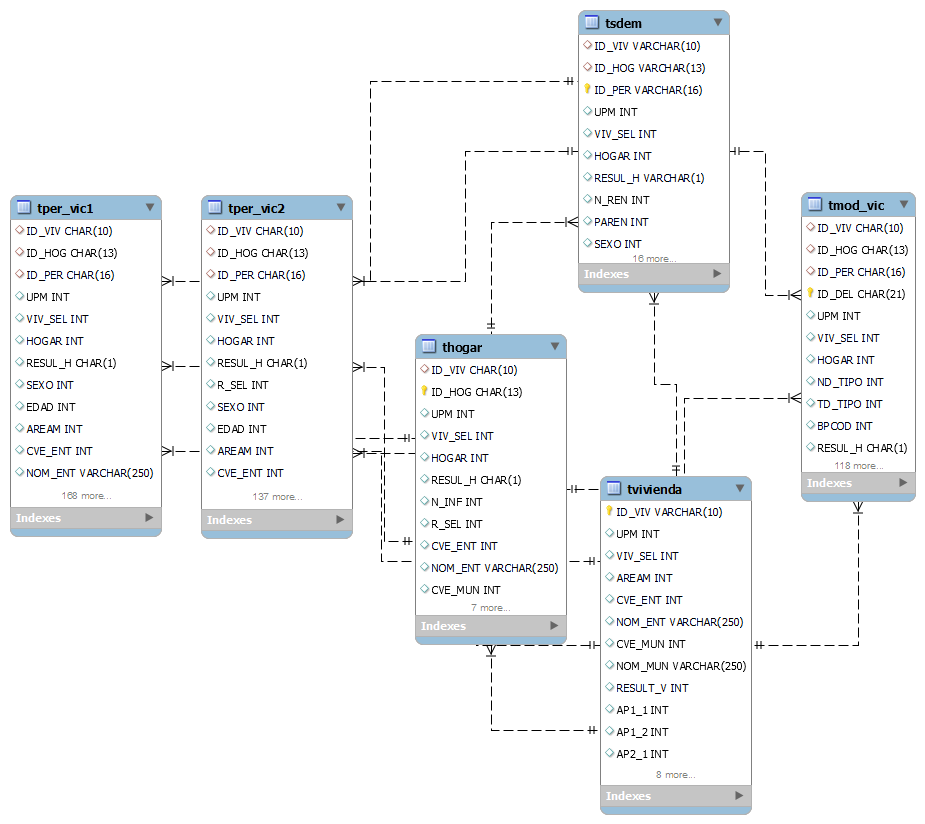

After that, the UTF-8-encoded CSV files with all the survey observations were loaded to their correspondent tables in the database.

Finally, after a thorough review of all the atributes in each of the tables of the schema, the database was queried to gather only the relevant data and build the dataset to be used in this notebook (see the SQL query used <a href="https://raw.githubusercontent.com/DanielEduardoLopez/PublicSafetyMX/main/sql_query.sql">here</a>).

In [5]:
# Dataset importation

path = "https://raw.githubusercontent.com/DanielEduardoLopez/PublicSafetyMX/main/dataset.csv"
df = pd.read_csv(path)
df.head()

,HousingClass,PeopleHousehold,Kinship,Education,Activity,Job,Crime,Sex,Age,MetroArea,...,CrimeInjuries,NumberInjuries,CrimeKidnapping,NumberKidnappings,CrimeAssault,NumberAssaults,CrimeRape,NumberRapes,CrimeOther,NumberOther
0,1,1,1,8,1,2,3,2,28,14,...,2,0,2,0,2,0,2,0,2,0
1,1,2,1,8,6,0,7,2,73,14,...,2,0,2,0,2,0,2,0,2,0
2,1,2,2,9,6,0,7,2,73,14,...,2,0,2,0,2,0,2,0,2,0
3,1,2,1,8,6,0,7,2,73,14,...,2,0,2,0,2,0,2,0,2,0
4,1,2,2,9,6,0,7,2,73,14,...,2,0,2,0,2,0,2,0,2,0


<a class="anchor" id="exploration"></a>
___
## **3. Data Exploration**
___

### **3.1 Data Description** <a class="anchor" id="description"></a>

In [6]:
# Preview of the dataset
df

,HousingClass,PeopleHousehold,Kinship,Education,Activity,Job,Crime,Sex,Age,MetroArea,...,CrimeInjuries,NumberInjuries,CrimeKidnapping,NumberKidnappings,CrimeAssault,NumberAssaults,CrimeRape,NumberRapes,CrimeOther,NumberOther
0,1,1,1,8,1,2,3,2,28,14,...,2,0,2,0,2,0,2,0,2,0
1,1,2,1,8,6,0,7,2,73,14,...,2,0,2,0,2,0,2,0,2,0
2,1,2,2,9,6,0,7,2,73,14,...,2,0,2,0,2,0,2,0,2,0
3,1,2,1,8,6,0,7,2,73,14,...,2,0,2,0,2,0,2,0,2,0
4,1,2,2,9,6,0,7,2,73,14,...,2,0,2,0,2,0,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202499,1,7,3,6,1,2,10,1,21,0,...,2,0,2,0,2,0,2,0,2,0
202500,1,7,3,6,1,1,10,1,21,0,...,2,0,2,0,2,0,2,0,2,0
202501,1,7,6,6,5,0,10,1,21,0,...,2,0,2,0,2,0,2,0,2,0
202502,1,7,3,6,0,0,10,1,21,0,...,2,0,2,0,2,0,2,0,2,0


In [7]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202504 entries, 0 to 202503
Data columns (total 84 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   HousingClass                         202504 non-null  int64 
 1   PeopleHousehold                      202504 non-null  int64 
 2   Kinship                              202504 non-null  int64 
 3   Education                            202504 non-null  int64 
 4   Activity                             202504 non-null  int64 
 5   Job                                  202504 non-null  int64 
 6   Crime                                202504 non-null  int64 
 7   Sex                                  202504 non-null  int64 
 8   Age                                  202504 non-null  int64 
 9   MetroArea                            202504 non-null  int64 
 10  Month                                202504 non-null  int64 
 11  State                     

In [8]:
df.shape

(202504, 84)

So, the dataset comprises 84 columns with **202,504 observations**.

#### **Description of attributes in dataset** <a class="anchor" id="columns"></a>

The **description of each of the attributes** in the dataset is as follows:

| Attribute | Description (English)                                                                               | Description (Spanish)                                                                                         |
|------------------------------------|-----------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------|
| HousingClass                       | Housing type                                                                                        | Tipo de vivienda                                                                                              |
| PeopleHousehold                    | Number of people living in the home                                                                 | Número de personas viviendo en la vivienda                                                                    |
| Kinship                            | Relationship with the head of the household                                                         | Parentesco con el jefe del hogar                                                                              |
| Education                          | Education                                                                                           | Educación                                                                                                     |
| Activity                           | Activity                                                                                            | Actividad                                                                                                     |
| Job                                | Job                                                                                                 | Trabajo                                                                                                       |
| Crime                              | Type of crime                                                                                       | Tipo de delito                                                                                                |
| Sex                                | Sex                                                                                                 | Género                                                                                                        |
| Age                                | Age                                                                                                 | Edad                                                                                                          |
| MetroArea                          | Metropolitan area of occurrence of the crime                                                        | Area metropolitana de ocurrencia del delito                                                                   |
| Month                              | Month of occurrence of the crime                                                                    | Mes de ocurrencia del delito                                                                                  |
| State                              | State of occurrence of the crime                                                                    | Estado de ocurrencia del delito                                                                               |
| Municipality                       | Municipality of occurrence of the crime                                                             | Municipio de ocurrencia del delito                                                                            |
| Hour                               | Crime occurrence time                                                                               | Hora de ocurrencia del delito                                                                                 |
| Place                              | Place of occurrence of the crime                                                                    | Lugar de ocurrencia del delito                                                                                |
| Category                           | Urban-Rural                                                                                         | Urbano-Rural                                                                                                  |
| SocialClass                        | Socioeconomic stratum                                                                               | Estrato socioeconómico                                                                                        |
| InhabitingTime                     | Time living in the house                                                                            | Tiempo habitando en la vivienda                                                                               |
| StopGoingOutNight                  | Stop going out at night for fear of being a victim                                                  | Dejar de salir de noche por temor a ser víctima                                                               |
| StopChildrenAlone                  | Stop allowing minors to go out alone for fear of being a victim                                     | Dejar de permitir a menores salir solos por temor a ser víctima                                               |
| StopVisitingFamily                 | Stop visiting relatives or friends for fear of being a victim                                       | Dejar de visitar parientes o amigos por temor a ser víctima                                                   |
| StopTakingTaxis                    | Stop taking a taxi for fear of being a victim                                                       | Dejar de tomar taxi por temor a ser víctima                                                                   |
| StopTakingPublicTransit            | Stop using public transport for fear of being a victim                                              | Dejar de usar transporte público por temor a ser víctima                                                      |
| StopCarryingCash                   | Stop carrying cash for fear of being a victim                                                       | Dejar de llevar dinero en efectivo por temor a ser víctima                                                    |
| StopGoingSchool                    | Stop going to school for fear of being a victim                                                     | Dejar de ir a la escuela por temor a ser víctima                                                              |
| StopGoingCinema                    | Stop going to the movies or theater for fear of being a victim                                      | Dejar de ir al cine o teatro por temor a ser víctima                                                          |
| StopWalking                        | Stop going for a walk for fear of being a victim                                                    | Dejar de salir a caminar por temor a ser víctima                                                              |
| StopWearingJewels                  | Stop wearing jewelry for fear of being a victim                                                     | Dejar de usar joyas por temor a ser víctima                                                                   |
| StopEatingOut                      | Stop going out for lunch or dinner for fear of being a victim                                       | Dejar de salir a comer o cenar por temor a ser víctima                                                        |
| StopCreditCard                     | Stop carrying a credit or debit card for fear of being a victim                                     | Dejar de llevar tarjeta de crédito o débito por temor a ser víctima                                           |
| StopStadium                        | Stop going to the stadium for fear of being a victim                                                | Dejar de ir al estadio por temor a ser víctima                                                                |
| StopSupermart                      | Stop going to shopping malls for fear of being a victim                                             | Dejar de frecuentar centros comerciales por temor a ser víctima                                               |
| StopHighways                       | Stop traveling by road for fear of being a victim                                                   | Dejar de viajar por carretera por temor a ser víctima                                                         |
| StopMobilePhones                   | Stop carrying a mobile or cell phone for fear of being a victim                                     | Dejar de llevar teléfono móvil o celular por temor a ser víctima                                              |
| ProtectionDoorsWindows             | Crime protection measures: changing doors or windows                                                | Medidas de protección contra delincuencia: cambiar puertas o ventanas                                         |
| ProtectionLocks                    | Crime Protection Measures: change or place locks and/or padlocks                                    | Medidas de protección contra delincuencia: cambiar o colocar cerraduras y/o candados                          |
| ProtectionFences                   | Crime Protection Measures: place or reinforce bars or fences                                        | Medidas de protección contra delincuencia: colocar o reforzar rejas o bardas                                  |
| ProtectionAlarmsVideo              | Crime Protection Measures: install alarms and/or surveillance video cameras                         | Medidas de protección contra delincuencia: instalar alarmas y/o videocámaras de vigilancia                    |
| ProtectionPrivateSurveillance      | Crime Protection Measures: hire private surveillance in the street or neighborhood                  | Medidas de protección contra delincuencia: contratar vigilancia privada en la calle o colonia                 |
| ProtectionNeighbors                | Crime Protection Measures: carry out joint actions with your neighbors                              | Medidas de protección contra delincuencia: realizar acciones conjuntas con sus vecinos                        |
| ProtectionInsurance                | Crime Protection Measures: take out insurance                                                       | Medidas de protección contra delincuencia: contratar seguros                                                  |
| ProtectionDog                      | Crime Protection Measures: Buying a Watchdog                                                        | Medidas de protección contra delincuencia: comprar un perro guardián                                          |
| ProtectionWeapons                  | Crime Protection Measures: acquiring firearms                                                       | Medidas de protección contra delincuencia: adquirir armas de fuego                                            |
| ProtectionMoving                   | Crime Protection Measures: changing your home or place of residence                                 | Medidas de protección contra delincuencia: cambiarse de vivienda o lugar de residencia                        |
| ProtectionOther                    | Crime Protection Measures: Other measure                                                            | Medidas de protección contra delincuencia: Otra medida                                                        |
| ProtectionExpenses                 | Expenses in protection against crime                                                                | Gastos en protección contra delincuencia                                                                      |
| Automobiles                        | Car, van or truck owner household                                                                   | Hogar propietario de automóvil, camioneta o camión                                                            |
| NumberAutomobiles                  | Number of vehicles (cars, vans, or trucks) owned by the household                                   | Número de vehículos (automóviles, camionetas o camiones) propiedad del hogar                                  |
| CrimeVehicleTheft                  | Home victim of total vehicle theft                                                                  | Hogar víctima de robo total de vehículo                                                                       |
| NumberVehicleThefts                | Number of times home victim of total vehicle theft                                                  | Número de veces hogar víctima de robo total vehículo                                                          |
| CrimePartialVehicleTheft           | Home victim of partial vehicle theft                                                                | Hogar víctima de robo parcial de vehículo                                                                     |
| NumberPartialVehicleThefts         | Number of times home victim of partial vehicle theft                                                | Número de veces hogar víctima de robo parcial vehículo                                                        |
| CrimeVandalism                     | Home victim of graffiti or vandalism                                                                | Hogar víctima de grafiti o vandalismo                                                                         |
| NumberVandalisms                   | Number of times home victim of graffiti or vandalism                                                | Número de veces hogar víctima de grafiti o vandalismo                                                         |
| CrimeBurglary                      | Home victim of home-room robbery                                                                    | Hogar víctima de robo a casa                                                                                  |
| NumberBurglaries                   | Number of times home victim of burglary                                                             | Número de veces hogar víctima de robo a casa                                                                  |
| CrimeFamilyKidnapping              | Household victim of kidnapping                                                                      | Hogar víctima de secuestro                                                                                    |
| NumberFamilyKidnappings            | Number of members victims of kidnapping                                                             | Número de integrantes víctimas de secuestro                                                                   |
| CrimeFamilyEnforcedDisappearance   | Household victim of enforced disappearance                                                          | Hogar víctima de desaparición forzada                                                                         |
| NumberFamilyEnforcedDisappearances | Number of members victims of forced disappearance                                                   | Número de integrantes víctimas de desaparición forzada                                                        |
| CrimeFamilyMurder                  | Household victim of homicide                                                                        | Hogar víctima de homicidio                                                                                    |
| NumberMurders                      | Number of members victims of homicide                                                               | Número de integrantes víctimas de homicidio                                                                   |
| CrimeTheft                         | Robbery or assault victim                                                                           | Víctima de robo o asalto                                                                                      |
| NumberThefts                       | Number of times victim of robbery or assault                                                        | Número de veces víctima de robo o asalto                                                                      |
| CrimeOtherTheft                    | Robbery victim in a different form                                                                  | Víctima de robo en forma distinta                                                                             |
| NumberOtherThefts                  | Number of times victim of robbery in a different way                                                | Número de veces víctima de robo en forma distinta                                                             |
| CrimeBankFraud                     | Bank fraud victim                                                                                   | Víctima de fraude bancario                                                                                    |
| NumberBankFrauds                   | Number of times victim of fraud                                                                     | Número de veces víctima de fraude                                                                             |
| CrimeFraud                         | Consumer Fraud Victim                                                                               | Víctima de fraude al consumidor                                                                               |
| NumberFrauds                       | Number of times victim of consumer fraud                                                            | Número de veces víctima de fraude al consumidor                                                               |
| CrimeExtortion                     | Extortion victim                                                                                    | Víctima de extorsión                                                                                          |
| NumberExtortions                   | Number of times extortion victim                                                                    | Número de veces víctima de extorsión                                                                          |
| CrimeThreats                       | Victim of threats                                                                                   | Víctima de amenazas                                                                                           |
| NumberThreats                      | Number of times victim of threats                                                                   | Número de veces víctima de amenazas                                                                           |
| CrimeInjuries                      | Injury victim                                                                                       | Víctima de lesiones                                                                                           |
| NumberInjuries                     | Number of times victim of injuries                                                                  | Número de veces víctima de lesiones                                                                           |
| CrimeKidnapping                    | Kidnapping victim                                                                                   | Víctima de secuestro                                                                                          |
| NumberKidnappings                  | Number of times kidnapped                                                                           | Número de veces víctima de secuestro                                                                          |
| CrimeAssault                       | Victim of sexual harassment or intimidation, groping, indecent exposure, attempted rape             | Víctima de hostigamiento o intimidación sexual, manoseo, exhibicionismo, intento de violación                 |
| NumberAssaults                     | Number of times victim of sexual harassment or intimidation, groping, exhibitionism, attempted rape | Número de veces víctima de hostigamiento o intimidación sexual, manoseo, exhibicionismo, intento de violación |
| CrimeRape                          | Rape victim                                                                                         | Víctima de violación sexual                                                                                   |
| NumberRapes                        | Number of times rape victim                                                                         | Número de veces víctima de violación sexual                                                                   |
| CrimeOther                         | Victim of other crimes                                                                              | Víctima de otros delitos                                                                                      |
| NumberOther                        | Number of times victim of other crimes                                                              | Número de veces víctima de otros delitos                                                                      |

<font size="-1">The table above was created using this <a href="https://thisdavej.com/copy-table-in-excel-and-paste-as-a-markdown-table/">awesome resource</a>.</font>

#### **Values encoding of the categorical attributes in dataset** <a class="anchor" id="values"></a>

The encoding of the values for each categorical attribute according to [(INEGI, 2021)](#inegi), is as follows:

* **HousingClass**: 

Value | Description (English) | Description (Spanish)
--- | --- | ---
1 | Stand-alone house  | Casa independiente
2 | Apartment in building | Departamento en edificio
3 | *Vecindad* | Vivienda en vecindad
4 | Rooftop room housing | Vivienda en cuarto de azotea
5 | Premises not built for housing | Local no construido para habitación

* **Kinship**:

Value | Description (English) | Description (Spanish)
--- | --- | ---
1 | Household head  | Jefe(a)
2 | Spouse | Esposo(a) 
3 | Child | Hijo(a)
4 | Parent | Padre o madre
5 | Other relationship: uncle, nephew, cousin | Otro parentesco: tío(a), sobrino(a), primo(a)
6 | No relationship | Sin parentesco

* **Education**:

Value | Description (English) | Description (Spanish)
--- | --- | ---
0 | None  | Ninguno
1 | Preschool  | Preescolar
2 | Elementary | Primaria
3 | Secondary | Secundaria
4 | Technical career with finished secondary school | Carrera técnica con secundaria terminada
5 | Basic normal (with background in secondary) | Normal básica (con antecedente en secundaria)
6 | High School | Preparatoria o bachillerato
7 | Technical career with finished high school | Carrera técnica con preparatoria terminada
8 | Bachelor or professional | Licenciatura o profesional
9 | Master's or PhD | Maestría o doctorado
99 | Unspecified level | Nivel no especificado

* **Activity**:

Value | Description (English) | Description (Spanish)
--- | --- | ---
1 | Worker  | Trabajador
2 | Had a job, but didn't work | Tenía trabajo pero no trabajó
3 | Looking for a job | En busca de trabajo
4 | Student | Estudiante
5 | Housekeeper | Dedicado a los quehaceres del hogar
6 | Retired or pensioner | Jubilado(a) o pensionado(a)
7 | Permanently disabled from working | Incapacitado(a) permanentemente para trabajar
8 | Didn't work | No trabajó
9 | Not specified | No especificado

* **Job**:

Value | Description (English) | Description (Spanish)
--- | --- | ---
1 | Laborer or pawn  | Jornalero(a) o peón
2 | Employee or worker | Empleado(a) u obrero(a)
3 | Self-employed worker (does not hire workers) | Trabajador(a) por su cuenta (no contrata trabajadores)
4 | Boss or employer (hires workers) | Patrón(a) o empleador(a)? (contrata trabajadores)
5 | Unpaid worker | Trabajador(a) sin pago

* **Crime**:

| Value  | Description (English)                                                                                                                                                        | Description (Spanish)                                                                                                                                                         |
| ------ | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 1<br>  | Total vehicle theft (car, van, truck)                                                                                                                                        | Robo total de vehículo (automóvil, camioneta, camión)                                                                                                                         |
| 2<br>  | Theft of vehicle accessories, spare parts or tools (car, van, truck)                                                                                                         | Robo de accesorios, refacciones o herramientas de vehículos (automóvil, camioneta, camión)                                                                                    |
| 3<br>  | Fence painting or graffiti on your home, intentional scratches on your vehicle, or other types of vandalism                                                                  | Pinta de barda o grafiti en su casa, rayones intencionales en su vehículo u otro tipo de vandalismo                                                                           |
| 4<br>  | Someone entered your home or apartment without permission using force or deceit and stole or attempted to steal something                                                    | Alguien entró a su casa o departamento sin permiso mediante el uso de la fuerza o por engaños y robó o intentó robar algo                                                     |
| 5<br>  | Robbery or assault on the street or on public transport (includes bank or ATM robbery)                                                                                       | Robo o asalto en la calle o en el transporte público (incluye robo en banco o cajero automático)                                                                              |
| 6<br>  | Theft in a manner other than the above                                                                                                                                       | Robo en forma distinta a la anterior                                                                                                                                          |
| 7<br>  | Someone used your checkbook, card number, or bank account without your permission to charge or withdraw money from your accounts (bank fraud), or gave you counterfeit money | Alguien usó su chequera, número de tarjeta o cuenta bancaria sin su permiso para realizar cargos o para extraer dinero de sus cuentas (fraude bancario) o le dio dinero falso |
| 8<br>  | You gave money for a product or service that you did not receive as agreed (consumer fraud)                                                                                  | Entregó dinero por un producto o un servicio que no recibió conforme a lo acordado (fraude al consumidor)                                                                     |
| 9<br>  | Threats, pressure or tricks to demand money or property; or to make him do something or stop doing it (extortion)                                                            | Amenazas, presiones o engaños para exigirle dinero o bienes; o para que hiciera algo o dejara de hacerlo (extorsión)                                                          |
| 10<br> | Verbal threats from someone who is fully identified or in writing towards you saying that they are going to cause harm to you, your family, your property or your job        | Amenazas verbales de alguien plenamente identificado o por escrito hacia su persona diciendo que le va a causar un daño a usted, a su familia, a sus bienes o su trabajo      |
| 11<br> | Someone hit you just because of an abusive attitude or because of an argument, causing physical injury (bruises, fractures, cuts, etc.)                                      | Alguien sólo por actitud abusiva o por una discusión lo(a) golpeó generándole una lesión física (moretones, fracturas, cortadas, etc.)                                        |
| 12<br> | They kidnapped you to demand money or goods                                                                                                                                  | Lo secuestraron para exigir dinero o bienes                                                                                                                                   |
| 13<br> | Someone against your will assaulted you by sexual harassment or intimidation, groping, indecent exposure, or attempted rape                                                  | Alguien en contra de su voluntad lo(a) agredió mediante hostigamiento o intimidación sexual, manoseo, exhibicionismo o intento de violación                                   |
| 14<br> | Was forced by physical violence or threat by someone known or unknown to engage in unwanted sexual activity (sexual rape)                                                    | Fue obligado(a) mediante violencia física o amenaza por alguien conocido o desconocido a tener una actividad sexual no deseada (violación sexual)                             |
| 15<br> | Other crimes different from the previous ones                                                                                                                                | Otros delitos distintos a los anteriores                                                                                                                                      |
| A<br>  | Complete interview with victimization     

* **Sex**:

Value | Description (English) | Description (Spanish)
--- | --- | ---
1 | Male  | Hombre
2 | Female | Mujer

* **MetroArea**:

| Value  | Description      |
| ------ | ---------------- |
| 1<br>  | Ciudad de México |
| 2<br>  | Guadalajara      |
| 3<br>  | Monterrey        |
| 4<br>  | Puebla           |
| 5<br>  | León             |
| 6<br>  | La Laguna        |
| 7<br>  | San Luis Potosí  |
| 8<br>  | Mérida           |
| 9<br>  | Chihuahua        |
| 10<br> | Tampico          |
| 12<br> | Veracruz         |
| 13<br> | Acapulco         |
| 14<br> | Aguascalientes   |
| 15<br> | Morelia          |
| 16<br> | Toluca           |
| 17<br> | Saltillo         |
| 18<br> | Villahermosa     |
| 19<br> | Tuxtla Gutiérrez |
| 21<br> | Tijuana          |
| 24<br> | Culiacán         |
| 25<br> | Hermosillo       |
| 26<br> | Durango          |
| 27<br> | Tepic            |
| 28<br> | Campeche         |
| 29<br> | Cuernavaca       |
| 31<br> | Oaxaca           |
| 32<br> | Zacatecas        |
| 33<br> | Colima           |
| 36<br> | Querétaro        |
| 39<br> | Tlaxcala         |
| 40<br> | La Paz           |
| 41<br> | Cancún           |
| 43<br> | Pachuca          |

* **Month**:

| Value  | Description (English)     | Description (Spanish) |
| ------ | ------------------------- | --------------------- |
| 1<br>  | January                   | Enero                 |
| 2<br>  | February                  | Febrero               |
| 3<br>  | March                     | Marzo                 |
| 4<br>  | April                     | Abril                 |
| 5<br>  | May                       | Mayo                  |
| 6<br>  | June                      | Junio                 |
| 7<br>  | July                      | Julio                 |
| 8<br>  | August                    | Agosto                |
| 9<br>  | September                 | Septiembre            |
| 10<br> | October                   | Octubre               |
| 11<br> | November                  | Noviembre             |
| 12<br> | December                  | Diciembre             |
| 99<br> | Didn't know/Didn't answer | No sabe / no responde |

* **State**:

| Value  | Description                        |
| ------ | ---------------------------------- |
| 1<br>  | Aguascalientes                     |
| 2<br>  | Baja California                    |
| 3<br>  | Baja California Sur                |
| 4<br>  | Campeche                           |
| 5<br>  | Coahuila                           |
| 6<br>  | Colima                             |
| 7<br>  | Chiapas                            |
| 8<br>  | Chihuahua                          |
| 9<br>  | Ciudad de México                   |
| 10<br> | Durango                            |
| 11<br> | Guanajuato                         |
| 12<br> | Guerrero                           |
| 13<br> | Hidalgo                            |
| 14<br> | Jalisco                            |
| 15<br> | Estado de México                   |
| 16<br> | Michoacán de Ocampo                |
| 17<br> | Morelos                            |
| 18<br> | Nayarit                            |
| 19<br> | Nuevo León                         |
| 20<br> | Oaxaca                             |
| 21<br> | Puebla de Zaragoza                 |
| 22<br> | Querétaro                          |
| 23<br> | Quintana Roo                       |
| 24<br> | San Luis Potosí                    |
| 25<br> | Sinaloa                            |
| 26<br> | Sonora                             |
| 27<br> | Tabasco                            |
| 28<br> | Tamaulipas                         |
| 29<br> | Tlaxcala                           |
| 30<br> | Veracruz Llave                     |
| 31<br> | Yucatán                            |
| 32<br> | Zacatecas                          |
| 99<br> | Entidad federativa no especificada |


* **Municipality**:

| Value  | Description                        |
| ------ | ---------------------------------- |
| 1…570  | Municipality number                    |
| 999  | Not specified                   |

* **Hour**:

| Values | Description (English)                               | Description (Spanish)                  |
| ------ | --------------------------------------------------- | -------------------------------------- |
| 1<br>  | In the morning (from 6:01 a.m. to 12:00 p.m.)       | En la mañana (de 6:01 a 12:00 hrs.)    |
| 2<br>  | In the afternoon (from 12:01 a.m. to 6:00 p.m.)     | En la tarde (de 12:01 a 18:00 hrs.)    |
| 3<br>  | At night (from 6:01 p.m. to 12:00 a.m.)             | En la noche (de 18:01 a 24:00 hrs.)    |
| 4<br>  | In the early morning (from 12:01 a.m. to 6:00 a.m.) | En la madrugada (de 00:01 a 6:00 hrs.) |
| 9<br>  | Didn't know / Didn't answer                         | No sabe / no responde                  |

* **Place**:

| Value | Description (English)          | Description (Spanish)           |
| ----- | ------------------------------ | ------------------------------- |
| 1<br> | In the street                  | En la calle                     |
| 2<br> | At home                        | En su casa                      |
| 3<br> | In the workplace               | En su trabajo                   |
| 4<br> | In a business or establishment | En un negocio o establecimiento |
| 5<br> | In a public place              | En un lugar público             |
| 6<br> | In the public transportation   | En el transporte público        |
| 7<br> | In a highway                   | En una carretera                |
| 8<br> | Other                          | Otro                            |
| 9<br> | Didn't know / Didn't answer    | No sabe / no responde           |

* **Category**:

Value | Description (English) | Description (Spanish)
--- | --- | ---
U | Urban | Urbano
C | Urban complement | Complemento urbano
R | Rural | Rural

* **SocialClass**:

| Value | Description (English) | Description (Spanish) |
| ----- | --------------------- | --------------------- |
| 1<br> | Low income            | Bajo                  |
| 2<br> | Lower middle income   | Medio bajo            |
| 3<br> | Higher middle income  | Medio alto            |
| 4<br> | High income           | Alto                  |

* **InhabitingTime**:

| Value | Description (English)         | Description (Spanish)     |
| ----- | ----------------------------- | ------------------------- |
| 1<br> | Less than six months          | Menos de seis meses       |
| 2<br> | Between six months and a year | Entre seis meses y un año |
| 3<br> | More than a year              | Más de un año             |
| 9<br> | Didn't know / Didn't answer   | No sabe / no responde     |

On the other hand, the rest of attributes in the dataset have the following nomenclature:

| Value | Description (English)       | Description (Spanish) |
| ----- | --------------------------- | --------------------- |
| 1<br> | Yes                         | Sí                    |
| 2<br> | No                          | No                    |
| 3<br> | Not applicable              | No aplica             |
| 9<br> | Didn't know / Didn't answer | No sabe / no responde |



In [9]:
# Housing Class Attribute Dictionary
housing_class_dict = {
    1: "Stand-alone house",
    2: "Apartment in building",
    3: "Vecindad",
    4: "Rooftop room housing",
    5: "Premises not built for housing"
}

In [10]:
# Kinship Attribute Dictionary
kinship_dict = {
    1: "Household head",
    2: "Spouse",
    3: "Child",
    4: "Parent",
    5: "Other relationship",
    6: "No relationship"
}

In [11]:
# Education Attribute Dictionary
education_dict = {
    0: "None",
    1: "Preschool",
    2: "Elementary",
    3: "Secondary",
    4: "Technical career with finished secondary school",
    5: "Basic normal (with background in secondary)",
    6: "High School",
    7: "Technical career with finished high school",
    8: "Bachelor or professional",
    9: "Master's or PhD",
    99: "Not specified"
}

In [12]:
# Activity Attribute Dictionary
activity_dict = {
    1: "Worker",
    2: "Had a job, but didn't work",
    3: "Looking for a job",
    4: "Student",
    5: "Housekeeper",
    6: "Retired or pensioner",
    7: "Permanently disabled from working",
    8: "Didn't work",
    9: "Not specified",
}

In [13]:
# Job Attribute Dictionary
job_dict = {
    1: "Laborer or pawn",
    2: "Employee or worker",
    3: "Self-employed worker (does not hire workers)",
    4: "Boss or employer (hires workers)",
    5: "Unpaid worker"
}

In [14]:
# Crime Attribute Dictionary
crime_dict = {
    1:  "Total vehicle theft",
    2:  "Theft of vehicle spare parts",
    3:  "Vandalism",
    4:  "Burglary or housebreaking",
    5:  "Robbery on the street or on public transport",
    6:  "Other thefts",
    7:  "Bank fraud",
    8:  "Consumer fraud",
    9:  "Extortion",
    10: "Threats",
    11: "Physical injuries",
    12: "Kidnapping",
    13: "Sexual harassment or attempted rape",
    14: "Rape",
    15: "Other crimes",
    "A": "Complete interview with victimization"    
}

In [15]:
# Sex Attribute Dictionary
sex_dict = {
    1: "Male",
    2: "Female"
}

In [16]:
# Metropolitan Area Dictionary
metro_area_dict = {
    1:"Ciudad de México",
    2:"Guadalajara",
    3:"Monterrey",
    4:"Puebla",
    5:"León",
    6:"La Laguna",
    7:"San Luis Potosí",
    8:"Mérida",
    9:"Chihuahua",
    10:"Tampico",
    12:"Veracruz",
    13:"Acapulco",
    14:"Aguascalientes",
    15:"Morelia",
    16:"Toluca",
    17:"Saltillo",
    18:"Villahermosa",
    19:"Tuxtla Gutiérrez",
    21:"Tijuana",
    24:"Culiacán",
    25:"Hermosillo",
    26:"Durango",
    27:"Tepic",
    28:"Campeche",
    29:"Cuernavaca",
    31:"Oaxaca",
    32:"Zacatecas",
    33:"Colima",
    36:"Querétaro",
    39:"Tlaxcala",
    40:"La Paz",
    41:"Cancún",
    43:"Pachuca"
}

In [17]:
# Month Attribute Dictionary
month_dict = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "Octocer",
    11: "November",
    12: "December",
    99: "Not specified"
}

In [18]:
# State Attribute Dictionary
state_dict = {
    1: "Aguascalientes",
    2: "Baja California",
    3: "Baja California Sur",
    4: "Campeche",
    5: "Coahuila",
    6: "Colima",
    7: "Chiapas",
    8: "Chihuahua",
    9: "Ciudad de México",
    10: "Durango",
    11: "Guanajuato",
    12: "Guerrero",
    13: "Hidalgo",
    14: "Jalisco",
    15: "Estado de México",
    16: "Michoacán",
    17: "Morelos",
    18: "Nayarit",
    19: "Nuevo León",
    20: "Oaxaca",
    21: "Puebla",
    22: "Querétaro",
    23: "Quintana Roo",
    24: "San Luis Potosí",
    25: "Sinaloa",
    26: "Sonora",
    27: "Tabasco",
    28: "Tamaulipas",
    29: "Tlaxcala",
    30: "Veracruz",
    31: "Yucatán",
    32: "Zacatecas",
    99: "Not specified"
}

In [19]:
# Hour Attribute Dictionary
hour_dict = {
    1: "Morning",
    2: "Afternoon",
    3: "Night",
    4: "Early morning",
    9: "Not specified"
}

In [20]:
# Place Attribute Dictionary
place_dict = {
    1: "In the street",
    2: "At home",
    3: "In the workplace",
    4: "In a business or establishment",
    5: "In a public place",
    6: "In the public transportation",
    7: "In a highway",
    8: "Other",
    9: "Not specified",
}

In [21]:
# Category Attribute Dictionary
category_dict = {
    "U": "Urban",
    "C": "Urban complement",
    "R": "Rural"
}

In [22]:
# Social Class Atribute Dictionary
social_class_dict = {
    1: "Low income",
    2: "Lower middle income",
    3: "Higher middle income",
    4: "High income"
}

In [23]:
# Inhabiting Time Attribute Dictionary
inhabiting_time_dict = {
    1: "Less than six months",
    2: "Between six months and a year",
    3: "More than a year",
    9: "Not specified",
}

In [24]:
# Other Attributed dictionary
other_dict = {
    1: "Yes",
    2: "No",
    3: "Not applicable",
    9: "Not specified"
}

In [25]:
# Basic statistical description
df.describe()

,HousingClass,PeopleHousehold,Kinship,Education,Activity,Job,Crime,Sex,Age,MetroArea,...,CrimeInjuries,NumberInjuries,CrimeKidnapping,NumberKidnappings,CrimeAssault,NumberAssaults,CrimeRape,NumberRapes,CrimeOther,NumberOther
count,202504.000000,202504.000000,202504.000000,202504.000000,202504.000000,202504.000000,202504.000000,202504.000000,202504.000000,202504.000000,...,202504.000000,202504.000000,202504.000000,202504.000000,202504.000000,202504.000000,202504.000000,202504.000000,202504.000000,202504.000000
mean,1.076334,3.737393,2.364329,4.535851,1.721655,1.218124,6.067139,1.559110,36.720682,8.540908,...,1.959216,0.075692,1.997343,0.004933,1.932969,0.140921,1.996849,0.008711,1.996993,0.007684
std,0.317161,1.868884,1.280177,5.333646,2.048036,1.256889,3.360489,0.496495,14.357516,12.867257,...,0.434748,0.342204,0.111034,0.089389,0.294273,0.916760,0.149995,0.148815,0.141929,0.123688
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,18.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,3.000000,1.000000,26.000000,0.000000,...,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000
50%,1.000000,4.000000,2.000000,3.000000,1.000000,2.000000,5.000000,2.000000,34.000000,1.000000,...,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000
75%,1.000000,5.000000,3.000000,7.000000,1.000000,2.000000,9.000000,2.000000,45.000000,14.000000,...,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000
max,5.000000,19.000000,6.000000,99.000000,8.000000,5.000000,15.000000,2.000000,98.000000,43.000000,...,9.000000,5.000000,9.000000,3.000000,9.000000,99.000000,9.000000,6.000000,9.000000,4.000000


So, for instance, from the basic statistical description above, it is possible to see that most of the respondents of the survey: 
* Lived in stand-alone houses, 
* Had a family of about 4 members, 
* Had finished the secondary school,
* Etc.

A more complete exploration was carried out later at the **[Exploratory Data Analysis](#eda)**.

### **3.2 Data Quality** <a class="anchor" id="quality"></a>

#### **Missing values** <a class="anchor" id="missing"></a>

Missing data is common issue in real datasets. Thus, in the present section, the dataset was assessed to identify the number of missing values and its percentage.

In [26]:
# Missing Data
df.isnull().sum()

HousingClass       0
PeopleHousehold    0
Kinship            0
Education          0
Activity           0
                  ..
NumberAssaults     0
CrimeRape          0
NumberRapes        0
CrimeOther         0
NumberOther        0
Length: 84, dtype: int64

In [27]:
# Function to calculate the percentage of missing values for each column in the dataset

def missing_values_table(df):
        """
        Calculates the number of missing values and its corresponding percentage of total values 
        for each attribute in a pandas dataframe. 

        Parameters

        df: Dataset in the format of a Pandas dataframe

        Returns

        mis_val_table: Table with the missing values percentage for each attribute

        """        
        mis_val = df.isnull().sum()
        mis_val_percent = (mis_val / len(df)) * 100
        mis_val_table = pd.concat([pd.Series(mis_val.index), pd.Series(mis_val.values), 
                                   pd.Series(mis_val_percent.values)], axis=1)
        mis_val_table = mis_val_table.rename(
        columns = {0: 'Attribute', 1 : 'Missing Values', 2: '% of Total Values'})
        mis_val_table = mis_val_table[
            mis_val_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataset has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table.shape[0]) + " attributes that have missing values.")
        return mis_val_table

In [28]:
missing_values_table(df)

Dataset has 84 columns.
There are 0 attributes that have missing values.


,Attribute,Missing Values,% of Total Values


There are **no missing values** in the dataset. So, it was not necessary to perform filtering or imputation.

#### **Outliers** <a class="anchor" id="outliers"></a>

In this case, from the values description in the dataset. No observation should be greater than 99. Thus, outliers $> 99$ were searched.

In [29]:
pd.set_option('display.max_rows', 90)
(df.select_dtypes(include=[np.number]) > 99).fillna(0).sum(axis=0)

HousingClass                               0
PeopleHousehold                            0
Kinship                                    0
Education                                  0
Activity                                   0
Job                                        0
Crime                                      0
Sex                                        0
Age                                        0
MetroArea                                  0
Month                                      0
State                                      0
Municipality                           27124
Hour                                       0
Place                                      0
SocialClass                                0
InhabitingTime                             0
StopGoingOutNight                          0
StopChildrenAlone                          0
StopVisitingFamily                         0
StopTakingTaxis                            0
StopTakingPublicTransit                    0
StopCarryi

As we can see above, only the **Municipality** column has values above 99, which is expectable. So, the dataset is free from outliers.

### **3.3 Exploratory Data Analysis** <a class="anchor" id="eda"></a>

In this section, the data was explored. Nonetheless, as many attributes are present at the dataset, only some of them were analyzed in detail.

In [30]:
def plot_attribute_freq(series, map_dict, figsize = (8, 6), attribute_name = "Attribute", cols_emphasis = 1):
    """
    Plots and saves a frequency bar chart giving emphasis to the specified number of columns.

    Parameters

    series: Pandas series with the attribute observations.
    dict: Dictionary with the appropriate mapping of the attribute values and labels.
    figsize: Tuple with the size of the plot in inches.
    attribute_name: String with the name of the attribute.
    cols_emphasis: Integer with the number of columns (up to 3) to be given emphasis.

    Returns

    None

    """

    # Bar lists for emphasis
    bar_colors_1 = ['dimgray',]*100
    bar_colors_1.insert(0, sns.color_palette("Blues_r")[0])

    bar_colors_2 = bar_colors_1.copy()
    bar_colors_2.insert(1, sns.color_palette("Blues_r")[1])

    bar_colors_3 = bar_colors_2.copy()
    bar_colors_3.insert(2, sns.color_palette("Blues_r")[2])

    # Column selection for emphasis
    if cols_emphasis == 1:
        palette = bar_colors_1
    elif cols_emphasis == 2:
        palette = bar_colors_2
    elif cols_emphasis == 3:
        palette = bar_colors_3
    else:
        palette = bar_colors_1

    # Plot
    plt.figure(figsize = figsize)
    sns.barplot(x = series.value_counts().values, 
                y = series.value_counts().index.map(map_dict), 
                palette = palette,          
                alpha = 0.9)
    plt.xlabel('Frequency')
    plt.ylabel(attribute_name)
    plt.title('Observations per ' + attribute_name)
    plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))    
    plt.savefig("Fig_" + attribute_name.replace(" ","") + "FrequencyPlot.png", 
                dpi = 300, format = 'png',
                #transparent = True,
                bbox_inches = 'tight')
    plt.show()

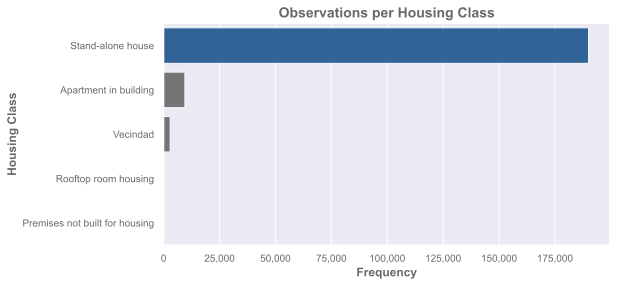

In [31]:
# Housing Class Attribute Plot
plot_attribute_freq(df.HousingClass, 
                    housing_class_dict,                     
                    attribute_name = "Housing Class", 
                    figsize = (8, 4), 
                    cols_emphasis = 1)

In view of the figure above, most of the surveyed people lived on **stand-alone houses**.

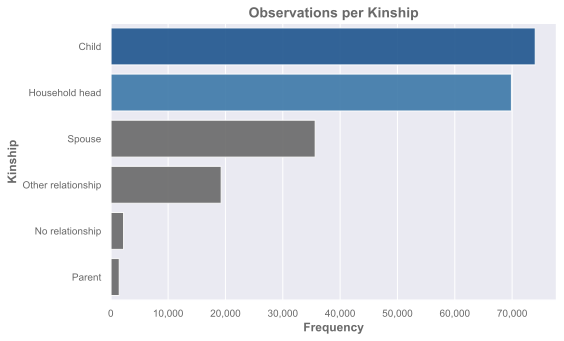

In [32]:
# Kinship Attribute Plot
plot_attribute_freq(df.Kinship, 
                    kinship_dict, 
                    attribute_name = "Kinship", 
                    figsize = (8, 5),
                    cols_emphasis = 2)

It is noteworthy that most of the answers to the survey were answered by the **children** of the head of the house and the **head of the house** himself.

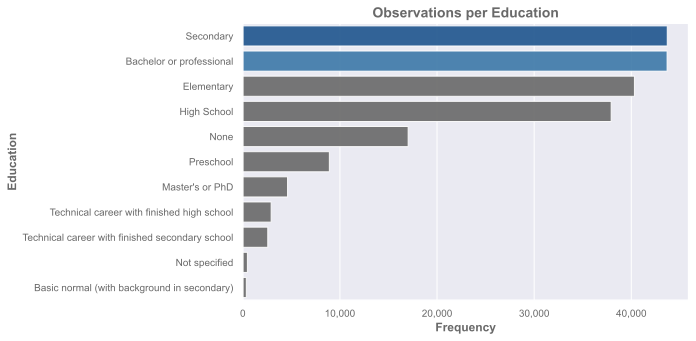

In [33]:
# Education Attribute Plot
plot_attribute_freq(df.Education, 
                    education_dict, 
                    attribute_name = "Education", 
                    figsize = (8, 5),
                    cols_emphasis = 2)

Most of the respondents held a **secondary certificate** or a **bachelor degree**. 

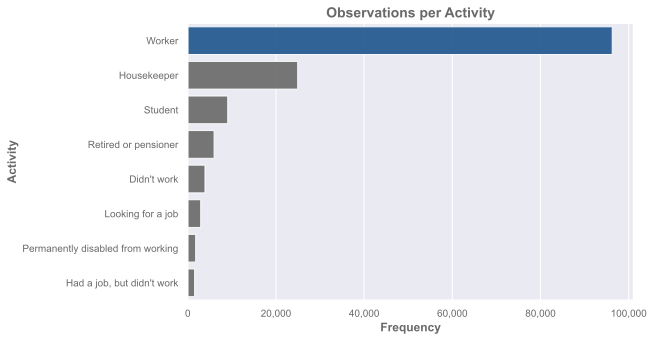

In [34]:
# Activity Attribute Plot
plot_attribute_freq(df.Activity, 
                    activity_dict, 
                    attribute_name = "Activity", 
                    figsize = (8, 5),
                    cols_emphasis = 1)

Most of the respondents were **workers**.

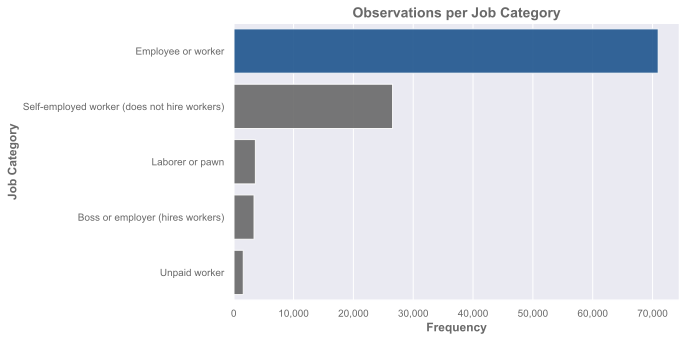

In [35]:
# Job Attribute Plot
plot_attribute_freq(df.Job, 
                    job_dict, 
                    attribute_name = "Job Category", 
                    figsize = (8, 5),
                    cols_emphasis = 1)

Again, most of the people surveyed were **workers or employees**.

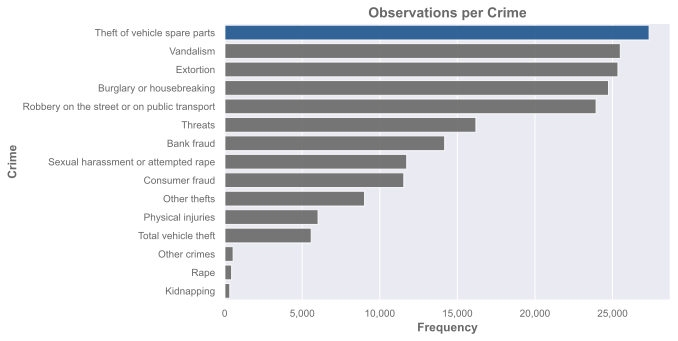

In [36]:
# Crime Attribute Plot
plot_attribute_freq(df.Crime, 
                    crime_dict, 
                    attribute_name = "Crime", 
                    figsize = (8, 5),
                    cols_emphasis = 1)

**Theft of vehicle spare parts** is the most common crime in the dataset.

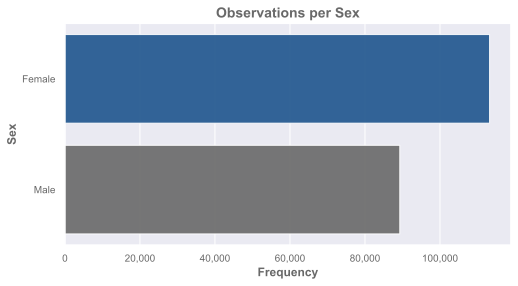

In [37]:
# Sex Attribute Plot
plot_attribute_freq(df.Sex, 
                    sex_dict, 
                    attribute_name = "Sex", 
                    figsize = (8, 4),
                    cols_emphasis = 1)

Most of the respondents to the survey were **female**.

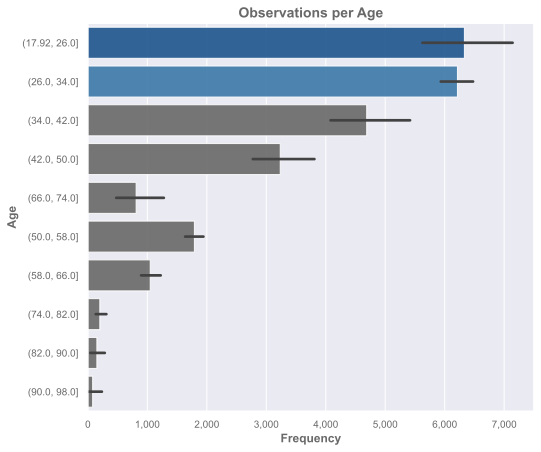

In [38]:
# Age Attribute Plot

# Bar lists for emphasis
bar_colors_1 = ['dimgray',]*100
bar_colors_1.insert(0, sns.color_palette("Blues_r")[0])

bar_colors_2 = bar_colors_1.copy()
bar_colors_2.insert(1, sns.color_palette("Blues_r")[1])

bar_colors_3 = bar_colors_2.copy()
bar_colors_3.insert(2, sns.color_palette("Blues_r")[2])

# Plot
plt.figure(figsize = (8, 7))
sns.barplot(x = df.Age.value_counts().values, 
            y = pd.cut(df.Age.value_counts().index, bins = 10).astype(str), 
            palette = bar_colors_2,          
            alpha = 0.9)
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.title('Observations per Age')
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.savefig("Fig_AgeFrequencyPlot.png", 
            dpi = 300, format = 'png',
            #transparent = True,
            bbox_inches = 'tight')
plt.show()

Most of the respondents were **from 18 to 34 years old**.

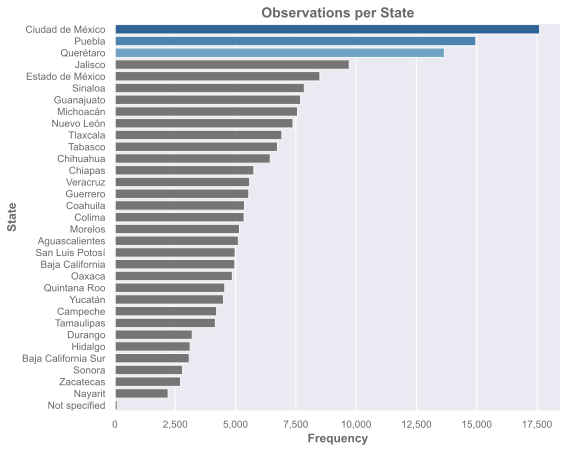

In [39]:
# States Attribute Plot
plot_attribute_freq(df.State, 
                    state_dict, 
                    attribute_name = "State", 
                    figsize = (8, 7),
                    cols_emphasis = 3)

Thus, most of the crime observations in the survey came from the center of Mexico, in particular, **Ciudad de México, Puebla and Querétaro**.

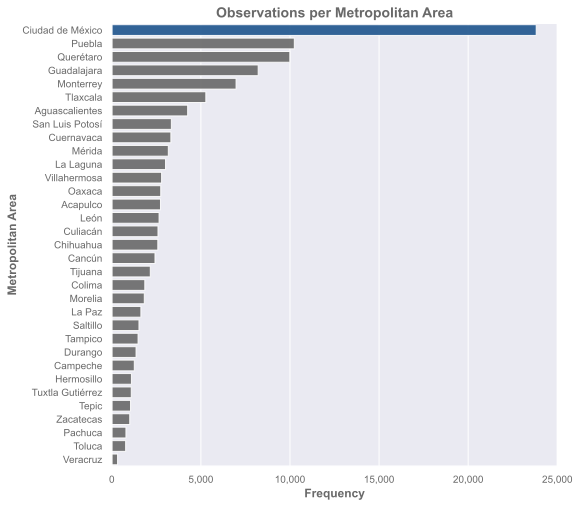

In [40]:
# Metropolitan Area Attribute Plot
plot_attribute_freq(df.MetroArea, 
                    metro_area_dict, 
                    attribute_name = "Metropolitan Area", 
                    figsize = (8, 8),
                    cols_emphasis = 1)

As expectable, most of the crime observations comes from the **Greater Mexico City area**.

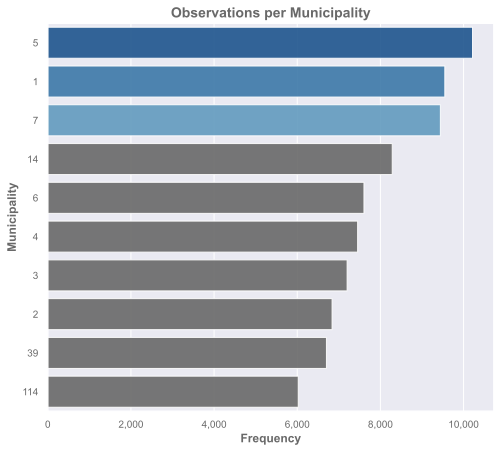

In [42]:
# Municipality Attribute Plot

# Bar lists for emphasis
bar_colors_1 = ['dimgray',]*100
bar_colors_1.insert(0, sns.color_palette("Blues_r")[0])

bar_colors_2 = bar_colors_1.copy()
bar_colors_2.insert(1, sns.color_palette("Blues_r")[1])

bar_colors_3 = bar_colors_2.copy()
bar_colors_3.insert(2, sns.color_palette("Blues_r")[2])

# Plot
plt.figure(figsize = (8, 7))
sns.barplot(x = df.Municipality.value_counts().values[:10], 
            y = df.Municipality.value_counts().index[:10].astype(str), 
            palette = bar_colors_3,          
            alpha = 0.9)
plt.xlabel('Frequency')
plt.ylabel('Municipality')
plt.title('Observations per Municipality')
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.savefig("Fig_MunicipalityFrequencyPlot.png", 
            dpi = 300, format = 'png',
            #transparent = True,
            bbox_inches = 'tight')
plt.show()

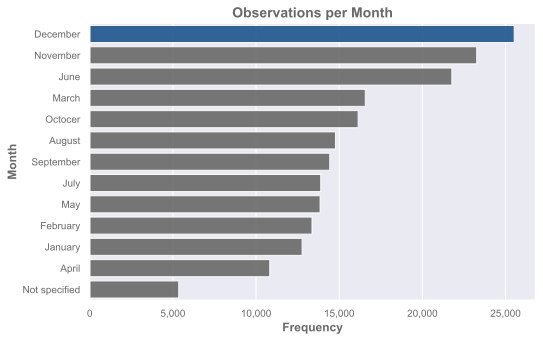

In [41]:
# Month Attribute Plot

plot_attribute_freq(df.Month, 
                    month_dict, 
                    attribute_name = "Month", 
                    figsize = (8, 5),
                    cols_emphasis = 1)

Interestingly, most of the crimes in the dataset were committed on **December**.

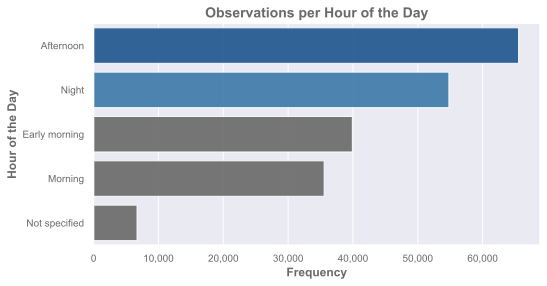

In [44]:
# Hour Attribute Plot
plot_attribute_freq(df.Hour, 
                    hour_dict, 
                    attribute_name = "Hour of the Day", 
                    figsize = (8, 4),
                    cols_emphasis = 2)

Most of the crimes were committed in the **afternoon** or at **night**.

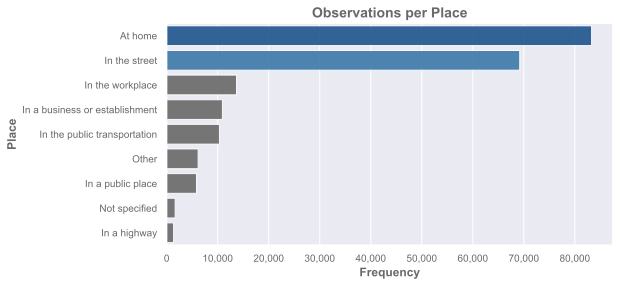

In [45]:
# Place Attribute Plot
plot_attribute_freq(df.Place, 
                    place_dict, 
                    attribute_name = "Place", 
                    figsize = (8, 4),
                    cols_emphasis = 2)

Shockingly, most of the crimes were commited either **at home or in the street**.

<a class="anchor" id="bibliography"></a>
___
## **8. Bibliography**
___

* <a class="anchor" id="balmori"></a> **Balmori de la Miyar, J. R., Hoehn‑Velasco, L. & Silverio‑Murillo, A. (2021).** The U‑shaped crime recovery during COVID‑19 evidence from national crime rates in Mexico. *Crime Science*. 10:14. https://doi.org/10.1186/s40163-021-00147-8
* <a class="anchor" id="calderon"></a> **Calderón, L. Y., Heinle, K., Kuckertz, R. E., Rodríguez-Ferreira, O. & Shirk, D. A. (eds.) (2021).** *Organized Crime and Violence in Mexico: 2021 Special Report*. Justice in Mexico, University of San Diego. https://justiceinmexico.org/wp-content/uploads/2021/10/OCVM-21.pdf 
* <a class="anchor" id="felbab"></a> **Felbab-Brown, V. (2019).** *Mexico’s out-of-control criminal market*. Brookings Institution. https://www.brookings.edu/wp-content/uploads/2019/03/FP_20190322_mexico_crime-2.pdf 
* <a class="anchor" id="inegi"></a> **INEGI (2022).** *Encuesta Nacional de Victimización y Percepción sobre Seguridad Pública (ENVIPE) 2022*. https://www.inegi.org.mx/programas/envipe/2022/
* <a class="anchor" id="resource"></a> **Mexico Violence Resource Project (2022).** *Essential Numbers*. UC San Diego’s Center for U.S.-Mexican Studies. https://www.mexicoviolence.org/essential-numbers
* <a class="anchor" id="rollins"></a> **Rollins, J. B. (2015)**. *Metodología Fundamental para la Ciencia de Datos. Somers: IBM Corporation.* https://www.ibm.com/downloads/cas/WKK9DX51